# Data Analysis: Coronavirus and Crimes at New York City

Unfortunately there is currently never a day where coronavirus is not on the news. The coronavirus has been putting the lives and health of people around the world at risk, causing secondary disasters such as economic decline.  

Recently there have been news regarding another type of secondary disaster: coronavirus scams. These malicious crimes are targeted toward vulnerable people by using the coronavirus as a way of threatening people, and this is just agonizing.

(See an example of the news here: https://www.newsweek.com/coronavirus-covid19-police-warning-scam-fake-cdc-experts-testing-1493459?fbclid=IwAR2jO2yaRVk-P2l9gQpbqTHkf_c8EO0wHn4FZVRjbArvGW1U5YKRiWDeOqU)  

These depressing stories are why we decided to conduct data analysis to uncover the relationship between coronavirus and crimes.

Specifically, we aim to discover a relationship between the coronavirus and crimes in New York City (NYC). Here, we focus on 2 types of crimes: burglary and robbery. 

Definitions:  
Burglary - entry into a building illegally with intent to commit a crime, especially theft.  
Robbery - the action of taking property unlawfully from a person or place by force or threat of force.  
(from Google Search's dictionary)

We have 4 reasons why we chose these 2 crimes:  
1. When the economy is declining, burglary and robbery seem to be crimes that are likely to increase
2. There were higher demands for necessity goods, with stores having sold out items, which may also increase the number of cases for burglary and robbery for necessity goods
3. Robbery may occur in parallel with coronavirus scams (according to the news)
4. Availability of data  
->Able to collect all of the burglary and robbery cases during March 1st to 22nd for the years 2018~2020 in NYC from SpotCrime (https://spotcrime.com/ny/new+york)

The analysis we conduct are the following:
- Difference in the total number of burglary and robbery cases during March 1st to 22nd, of the years 2018~2020
- Difference in the daily number of burglary and robbery cases during March 1st to 22nd, in 2020
- Concentration of the location of burglary and robbery cases during March 1st to 22nd, of the years 2018~2020

(We briefly explain the reasoning behind why we chose these analysis later in the beginning of each section)

Next, we preprocess the crime data before the analysis.

## Preprocessing

The data in SpotCrime was in the form of tables, which we copy-pasted onto an Excel workbook. 

(Although it was in the form of tables in SpotCrime, after the copy-paste the format changed so preprocessing became needed.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Excel File can be found on Github

# example url:
# https://spotcrime.com/ny/new+york?fbclid=IwAR2FShJaYSxrtwilE4tXlZINExpSfSJcZWA5TnCWpOaiLQL6iA0hXAsmSTM#crime-info

burg_2018_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2018Burg')
rob_2018_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2018Rob')
burg_2019_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2019Burg')
rob_2019_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2019Rob')
burg_2020_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2020Burg')
rob_2020_df = pd.read_excel('NYCrimes.xlsx', header=None, sheet_name='Mar2020Rob')

# Data collected from https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf
corona_cases_df = pd.read_excel('CoronaNYCCases.xlsx', sheet_name='CoronaNYCCases')

In [3]:
# Function to organize the data into a clean form with the columns ['crime_type', 'date', 'address']
def organize_df(df):
    crime_type = df.iloc[0::3]
    crime_type.reset_index(drop=True, inplace=True)
    date = df.iloc[1::3]
    date.reset_index(drop=True, inplace=True)
    address = df.iloc[2::3]
    address.reset_index(drop=True, inplace=True)
    combined = pd.concat([crime_type, date, address], axis=1)
    combined.columns = ['crime_type', 'date', 'address']
    return combined

In [4]:
# Organize each data of each sheet, and concatenate all of them
burg_2018_df = organize_df(burg_2018_df)
rob_2018_df = organize_df(rob_2018_df)
burg_2019_df = organize_df(burg_2019_df)
rob_2019_df = organize_df(rob_2019_df)
burg_2020_df = organize_df(burg_2020_df)
rob_2020_df = organize_df(rob_2020_df)
full_df = pd.concat([burg_2018_df, rob_2018_df, burg_2019_df, rob_2019_df, burg_2020_df, rob_2020_df], axis=0)
full_df.reset_index(inplace=True, drop=True)

# Output full concatenated dataframe as csv file
full_df.to_csv('nycrimes_mar_2018_to_2020.csv')

In [5]:
# Read full burglary and robbery csv file
df = pd.read_csv('nycrimes_mar_2018_to_2020.csv', index_col=0, parse_dates=['date'])
df.head()

crime_type       date                   address
0   Burglary 2018-03-08      300 BLOCK OF 43RD ST
1   Burglary 2018-03-08                       NaN
2   Burglary 2018-03-08  200 BLOCK OF HUMBOLDT ST
3   Burglary 2018-03-08         350-398 W 49TH ST
4   Burglary 2018-03-08   100 BLOCK OF E BROADWAY

## Difference in the total number of burglary and robbery cases during March 1st to 22nd, of the years 2018~2020

The goal of this analysis is to see whether there is a seemingly abnormal increase/decrease in the total number of crimes that occurred during March 1st to 22nd, 2020, compared to previous years. If there is an obvious increase/decrease, then we may be able to relate that to the coronavirus crisis.

In [6]:
burglary_df = df[df['crime_type']=='Burglary']
robbery_df = df[df['crime_type']=='Robbery']
years_list = np.unique(df.date.dt.year)

burglary_count_l = []
robbery_count_l = []
len(df[df.date.dt.year==2018])
for year in years_list:
    burglary_count_l.append(len(burglary_df[burglary_df.date.dt.year==year]))
    robbery_count_l.append(len(robbery_df[robbery_df.date.dt.year==year]))

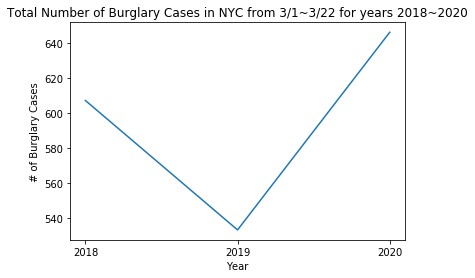

In [7]:
plt.plot(years_list, burglary_count_l)
plt.xticks(np.arange(years_list[0], years_list[-1]+1), labels=years_list)
plt.title('Total Number of Burglary Cases in NYC from 3/1~3/22 for years 2018~2020')
plt.xlabel('Year')
plt.ylabel('# of Burglary Cases')
plt.show()

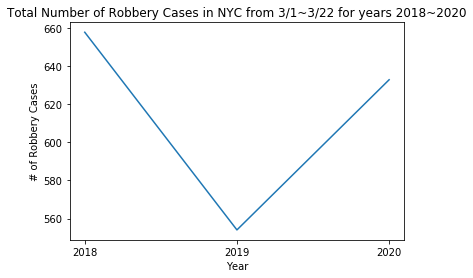

In [8]:
plt.plot(years_list, robbery_count_l)
plt.xticks(np.arange(years_list[0], years_list[-1]+1), labels=years_list)
plt.title('Total Number of Robbery Cases in NYC from 3/1~3/22 for years 2018~2020')
plt.xlabel('Year')
plt.ylabel('# of Robbery Cases')
plt.show()

From the two graphs, we cannot say confidently that there was a increase/decrease in burglary or robbery cases during March 1~22 for 2020, compared to previous years. This means that despite the trend of more people staying at home, the total number of burglary and robbery cases haven't been decreasing.  
Now let's look at the specific number of daily cases during March 1st to 22nd, 2020.

## Difference in the daily number of burglary and robbery cases during March 1st to 22nd, in 2020

By looking at the daily number burglary and robbery cases during the coronavirus crisis, we may be able to discover a relationship between burglary, robbery, and the coronavirus.

In [9]:
burglary_2020_df = burglary_df[burglary_df.date.dt.year==2020]
robbery_2020_df = robbery_df[robbery_df.date.dt.year==2020]
day_list = np.arange(1,23)

burglary_daily_count_l = []
robbery_daily_count_l = []

for day in day_list:
    burglary_daily_count_l.append(len(burglary_2020_df[burglary_2020_df.date.dt.day==day]))
    robbery_daily_count_l.append(len(robbery_2020_df[robbery_2020_df.date.dt.day==day]))

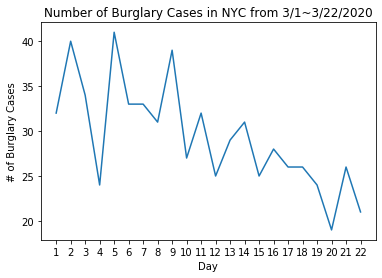

In [10]:
plt.plot(day_list, burglary_daily_count_l)
plt.xticks(np.arange(day_list[0], day_list[-1]+1), labels=day_list)
plt.title('Number of Burglary Cases in NYC from 3/1~3/22/2020')
plt.xlabel('Day')
plt.ylabel('# of Burglary Cases')
plt.show()

There seems to be a decrease in the number of burglary cases as days are progressing. Intuitively, this is because it is more likely that there are people inside buildings (homes) due to the coronavirus, which prevent burglars from entering the building to commit crimes.  

We plot the daily number of positive coronavirus cases below, and calculate the correlation.

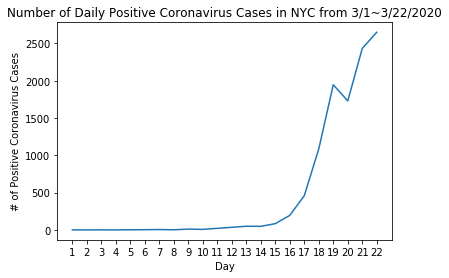

In [11]:
plt.plot(day_list, corona_cases_df.Cases)
plt.xticks(np.arange(day_list[0], day_list[-1]+1), labels=day_list)
plt.title('Number of Daily Positive Coronavirus Cases in NYC from 3/1~3/22/2020')
plt.xlabel('Day')
plt.ylabel('# of Positive Coronavirus Cases')
plt.show()

In [12]:
np.corrcoef(burglary_daily_count_l, corona_cases_df.Cases)

array([[ 1.        , -0.60099685],
       [-0.60099685,  1.        ]])

We can find a correlation of -0.6 between the daily number of burglary cases and positive coronavirus cases, which is a fairly strong negative correlation. Conducting a significance test for the correlation, the p-value was 0.003158, which is significant at significance level 0.01.

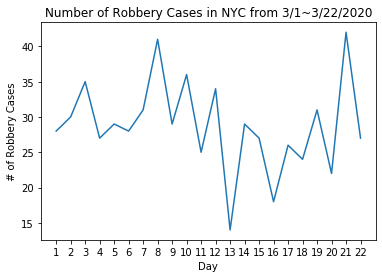

In [13]:
plt.plot(day_list, robbery_daily_count_l)
plt.xticks(np.arange(day_list[0], day_list[-1]+1), labels=day_list)
plt.title('Number of Robbery Cases in NYC from 3/1~3/22/2020')
plt.xlabel('Day')
plt.ylabel('# of Robbery Cases')
plt.show()

The number of robbery cases do not seem to change regardless of the increasing trend of people staying at home. Since robbery is theft by force or threat of force, it can be hypothesized that criminals will commit robbery regardless of whether a person is there or not. In otherwords, we may be able to say that robbery criminals are active as usual even during a pandemic.

We also calculate the correlation against the number of positive coronavirus cases.

In [14]:
np.corrcoef(robbery_daily_count_l, corona_cases_df.Cases)

array([[1.        , 0.09146265],
       [0.09146265, 1.        ]])

There is no correlation (=0.09) between the daily number of robbery cases and positive coronavirus cases, just like our understanding from the plot.

Next, we try to discover the different areas where burglary and robbery is likely to occur, given the current situation of the coronavirus.

## Concentration of the location of burglary and robbery cases

This analysis focuses on the locations of burglary and robbery cases using heatmap visualization through Carto. We want to examine if there are any abnormal concentration of cases in NYC, and this understanding may help with us with avoiding and preventing crime.

#### Burglary and Robbery Heatmap (March 1~22, 2018)

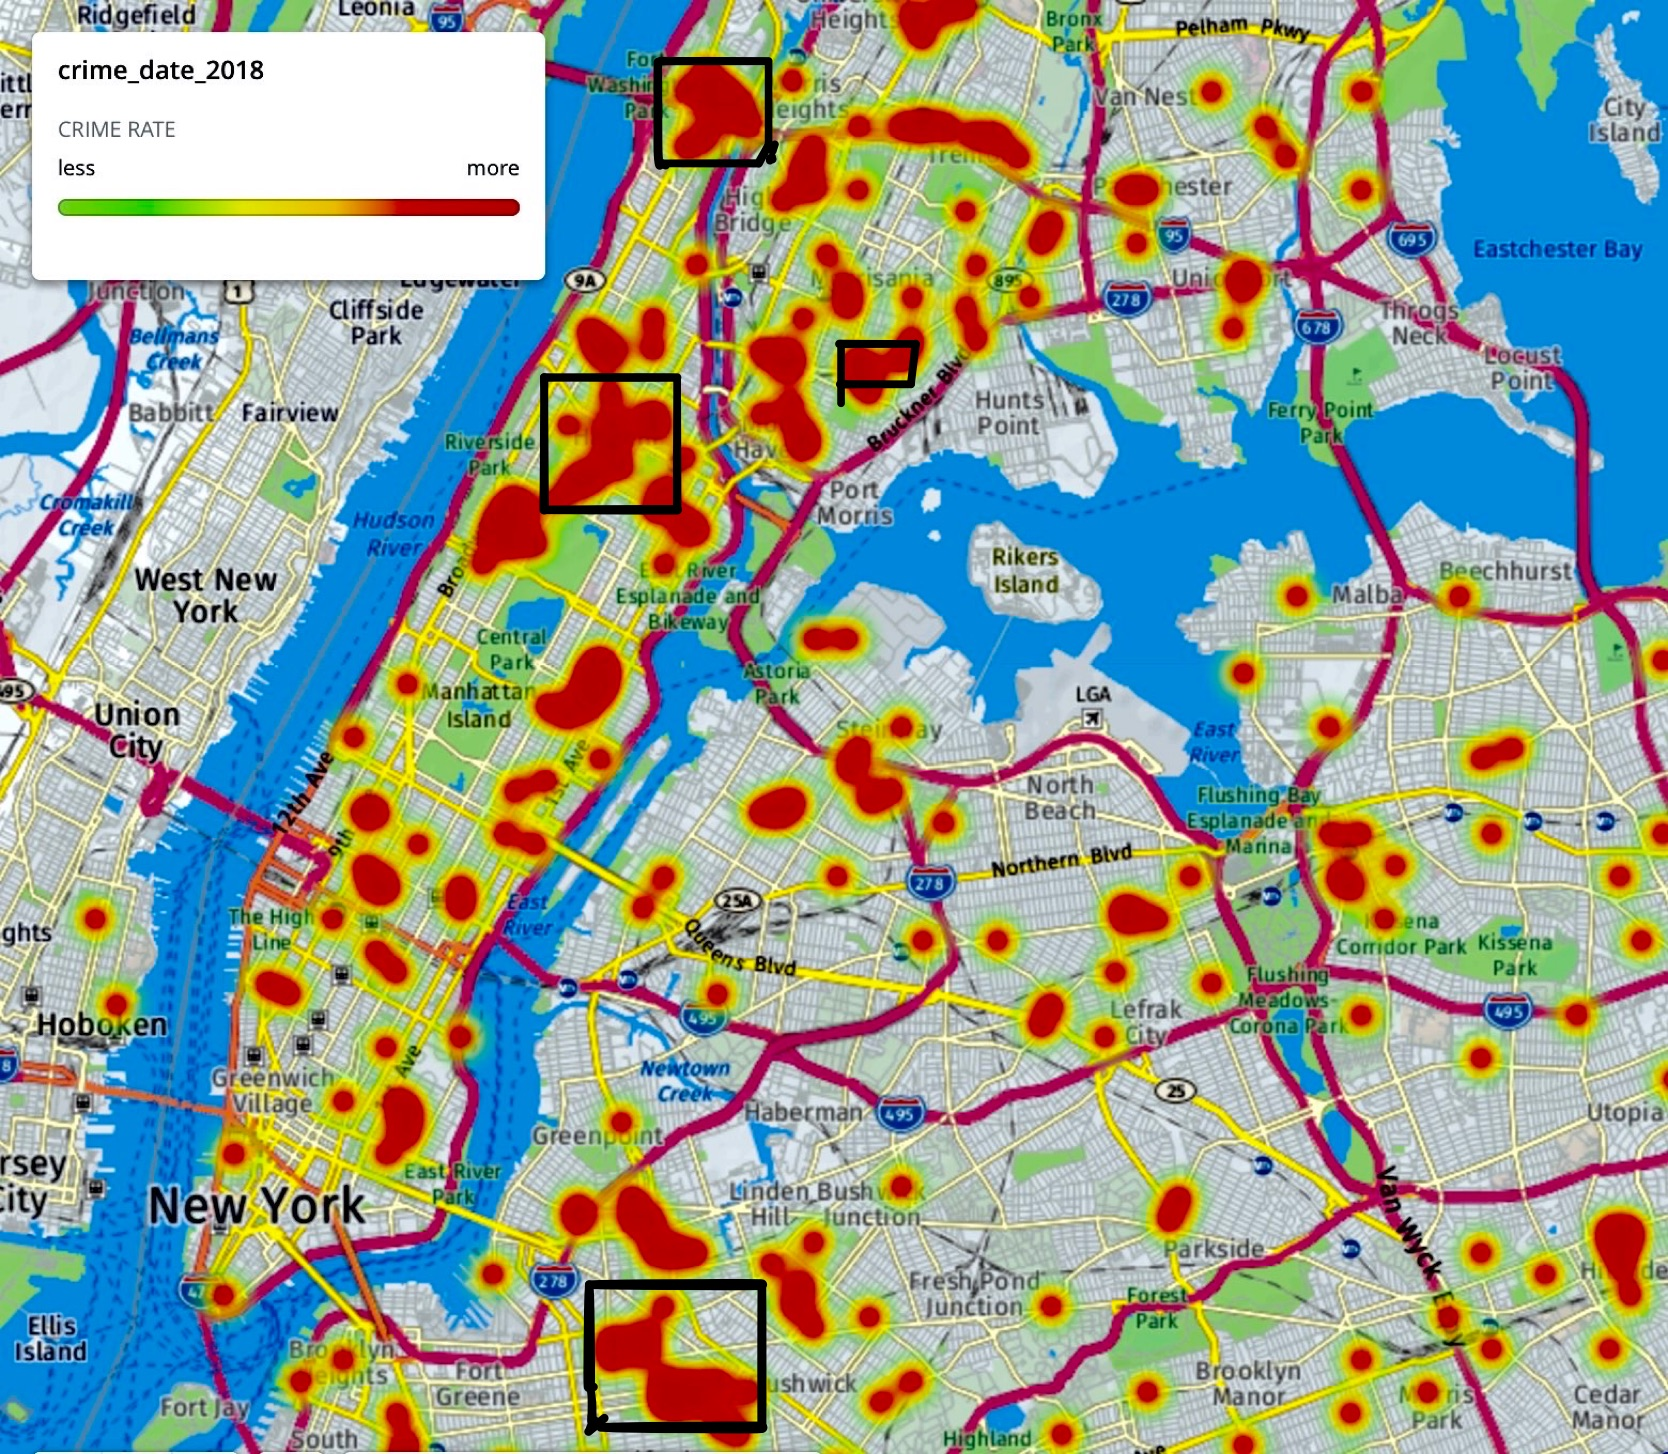

In [3]:
from IPython.display import Image
Image(filename="img/2018.jpg",width=400,height=400)

From the crime heatmap in year 2018, crimes concentrated on areas of HARLEM (near The Studio Museum in Harlem), HUDSON HEIGHTS (near Highbridge Park), St.Mary's Park area and MAPLETON (near Washington Cemetery park). In short, crimes in 2018 mostly happened in the Harlem area and downtown Brooklyn area with a concentration around restaurants, landmarks and parks.

#### Burglary and Robbery Heatmap (March 1~22, 2019)

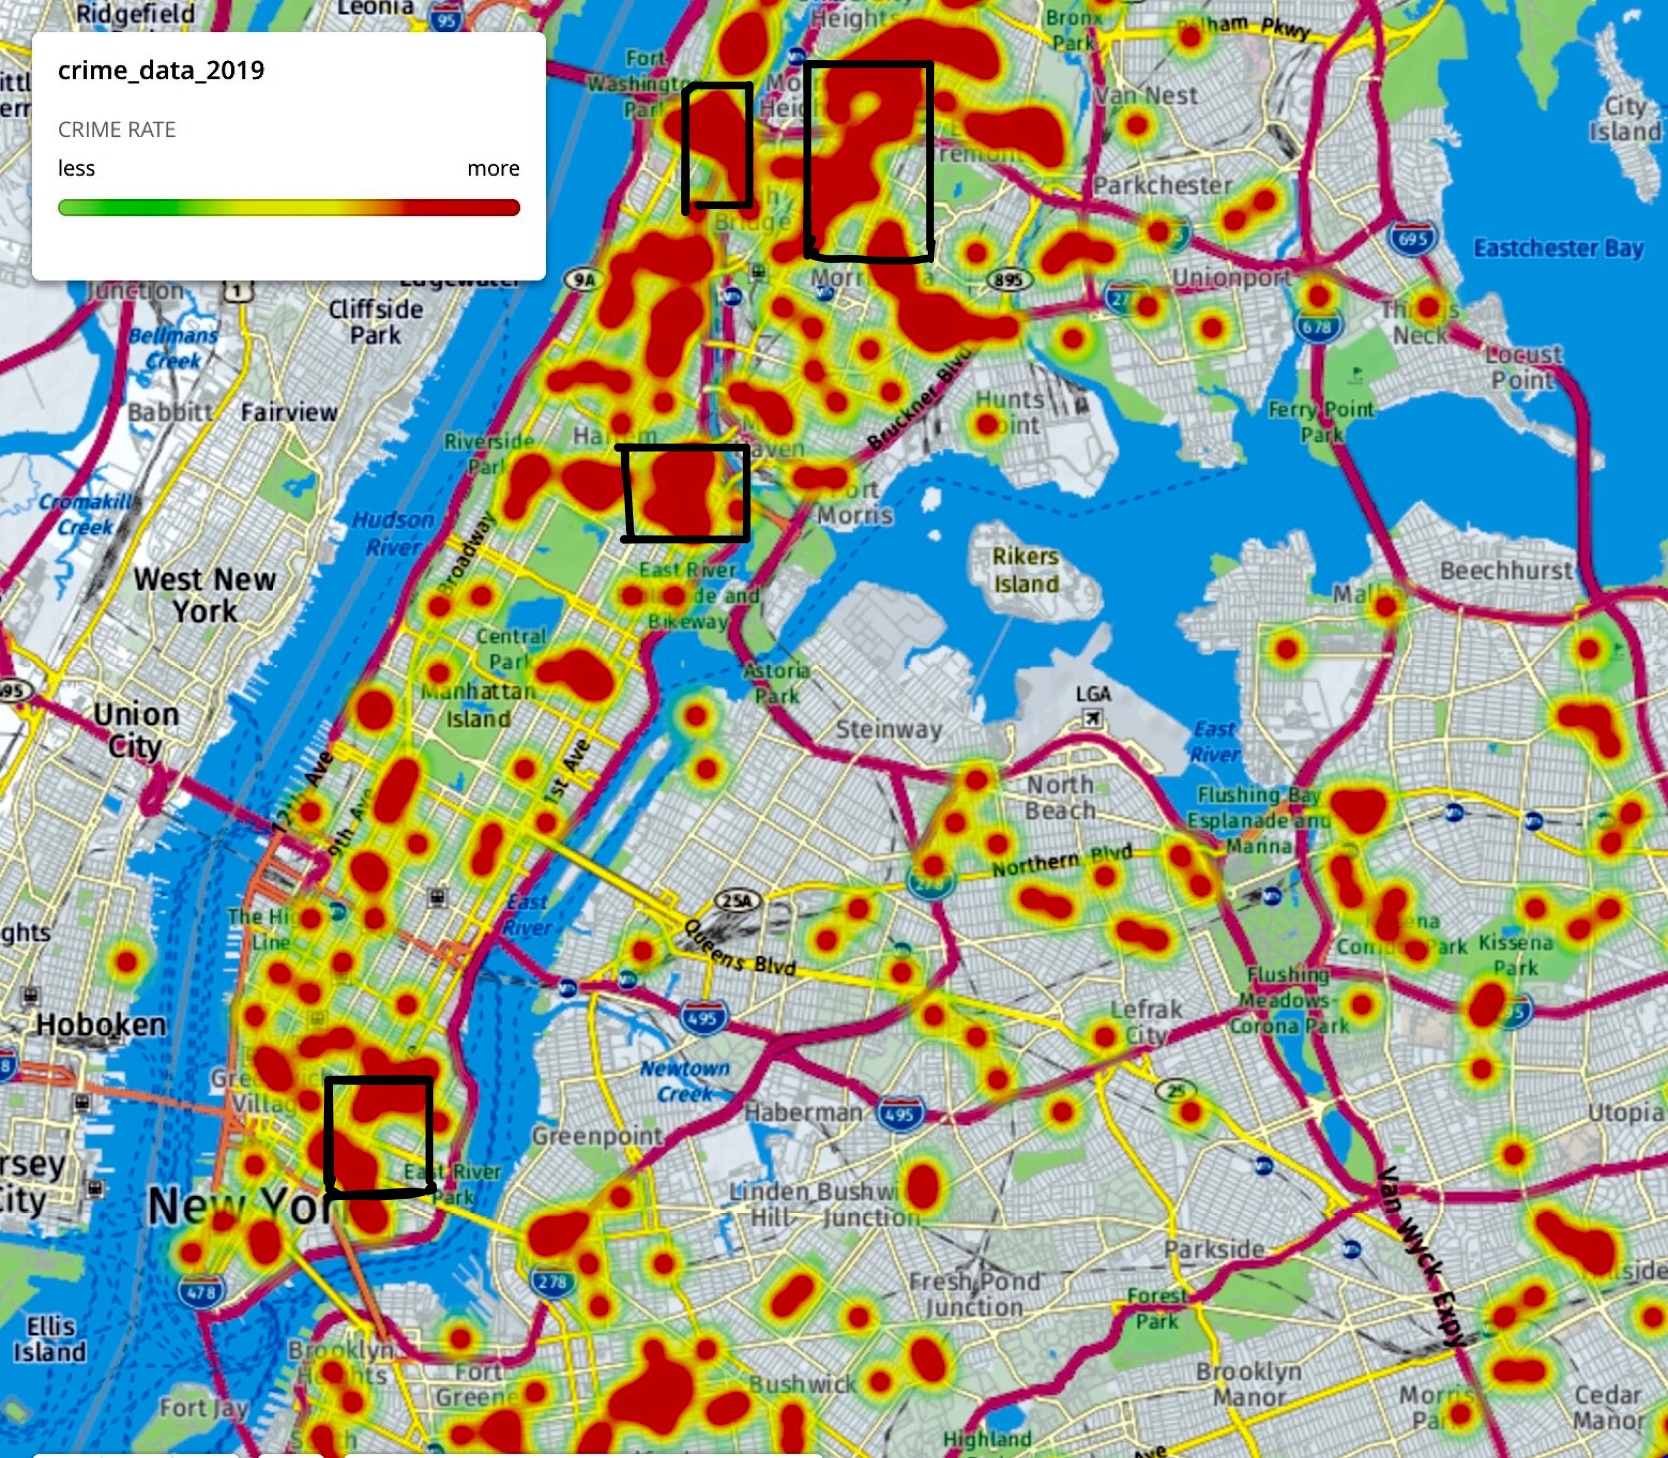

In [14]:
Image(filename="img/2019.jpg",width=400,height=400)

In March 2019, the crime concentrations made a shift from Upper Manhattan area to West Bronx area and also areas of Morris Heights, MT Hope, and MT EDEN compared to March 2018. New crime concentrations are located near Sugar Hill area, East village, and SOHO area.

#### Burglary and Robbery Heatmap (March 1~22, 2020)

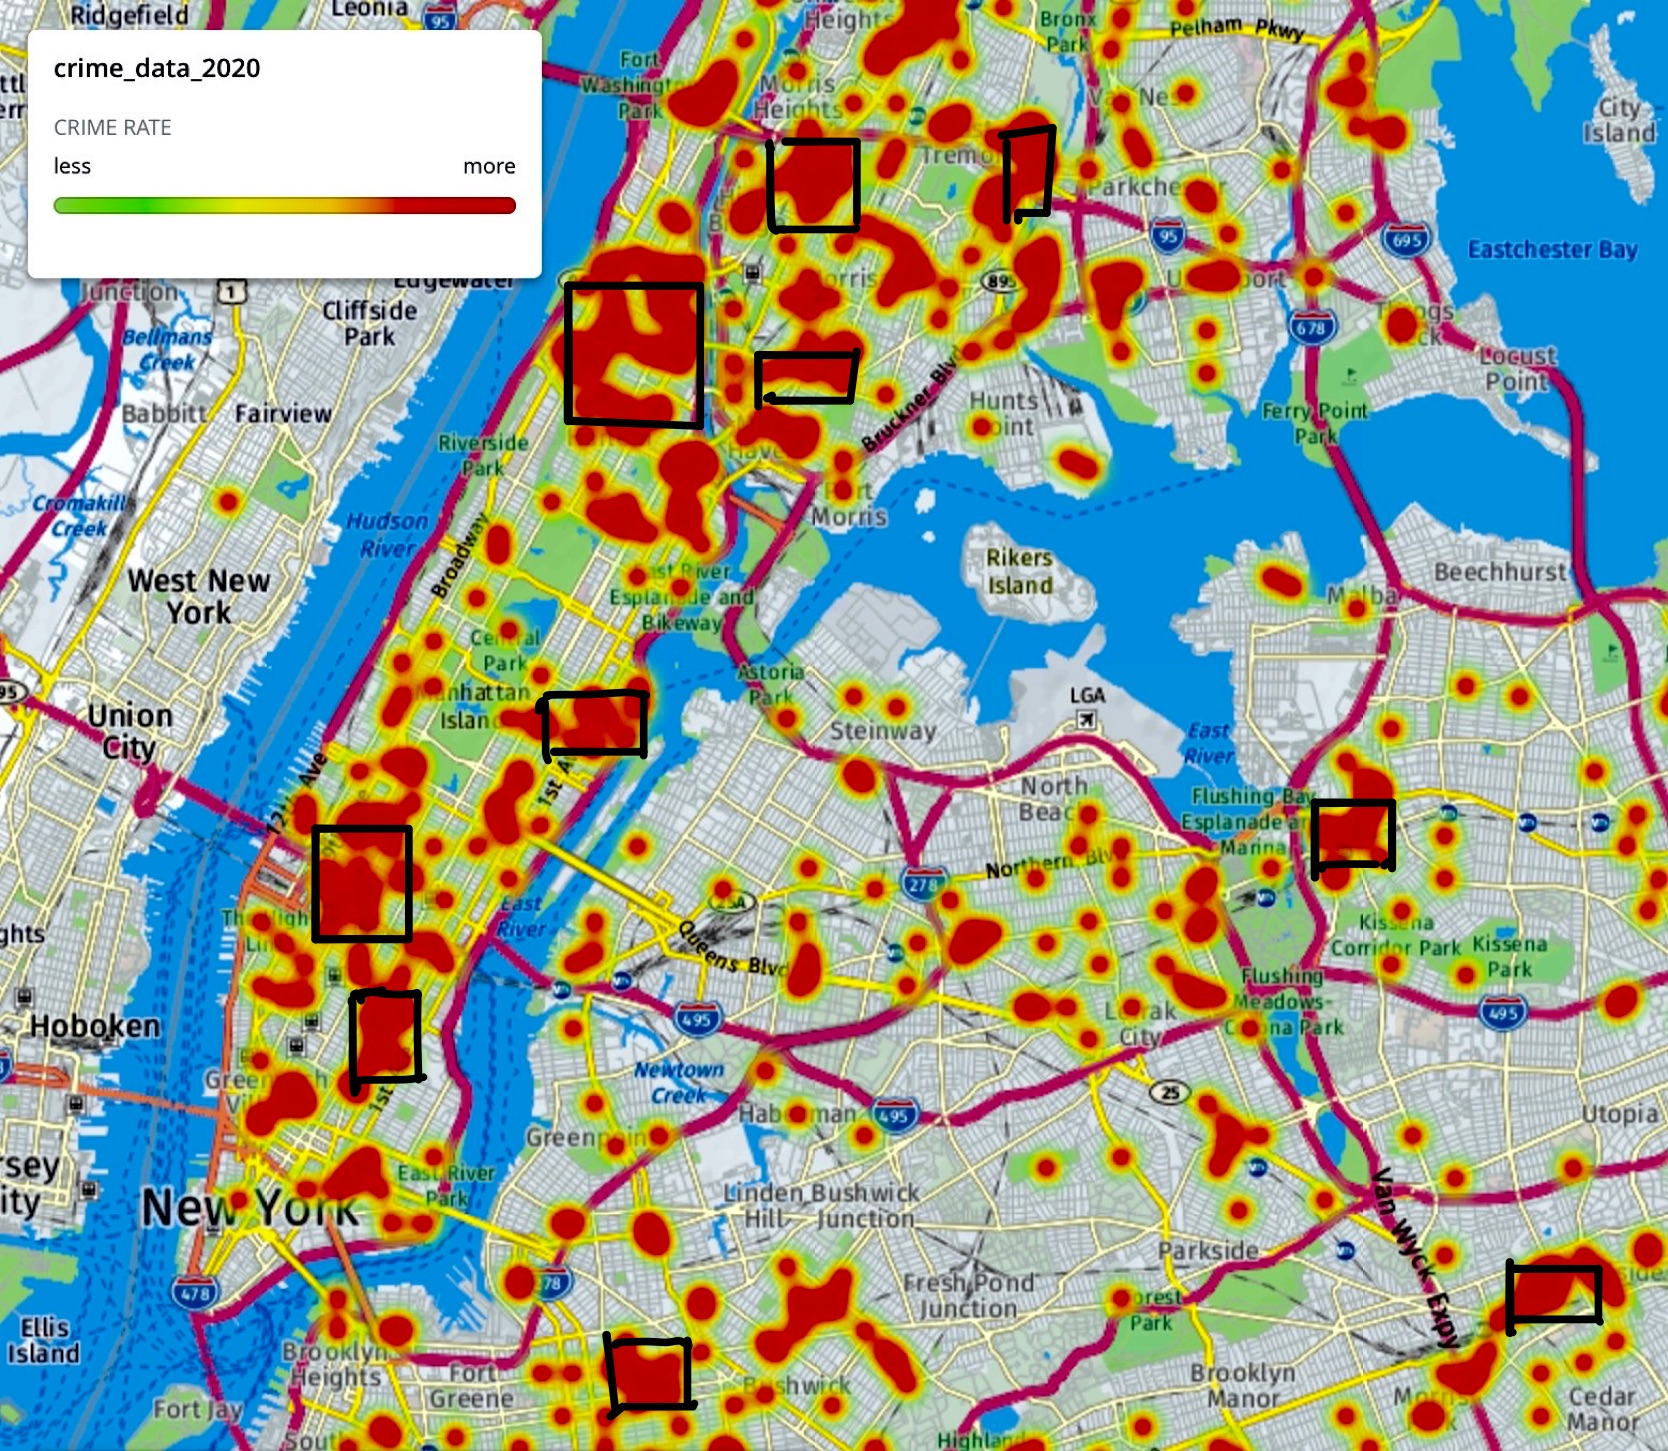

In [15]:
Image(filename="img/2020.jpg",width=400,height=400)

In March 2020, the crimes tend to be much more spread out compared to previous years. This could be because more people (criminals are included) staying at their own homes instead of gathering in one location (workplace, restaurant, landmark). Moreover, crimes could happen more frequently at local stores due to the high demand of necessity goods. New crime concentrations are the Bronx Zoo, Queens Botanical Garden, South Jamaica, Midtown Manhattan area, and Greenwich village area: where many stores and residential communities are located.

#### Now let's exam Heatmaps only on burglary cases for March 1-22, 2018-2020

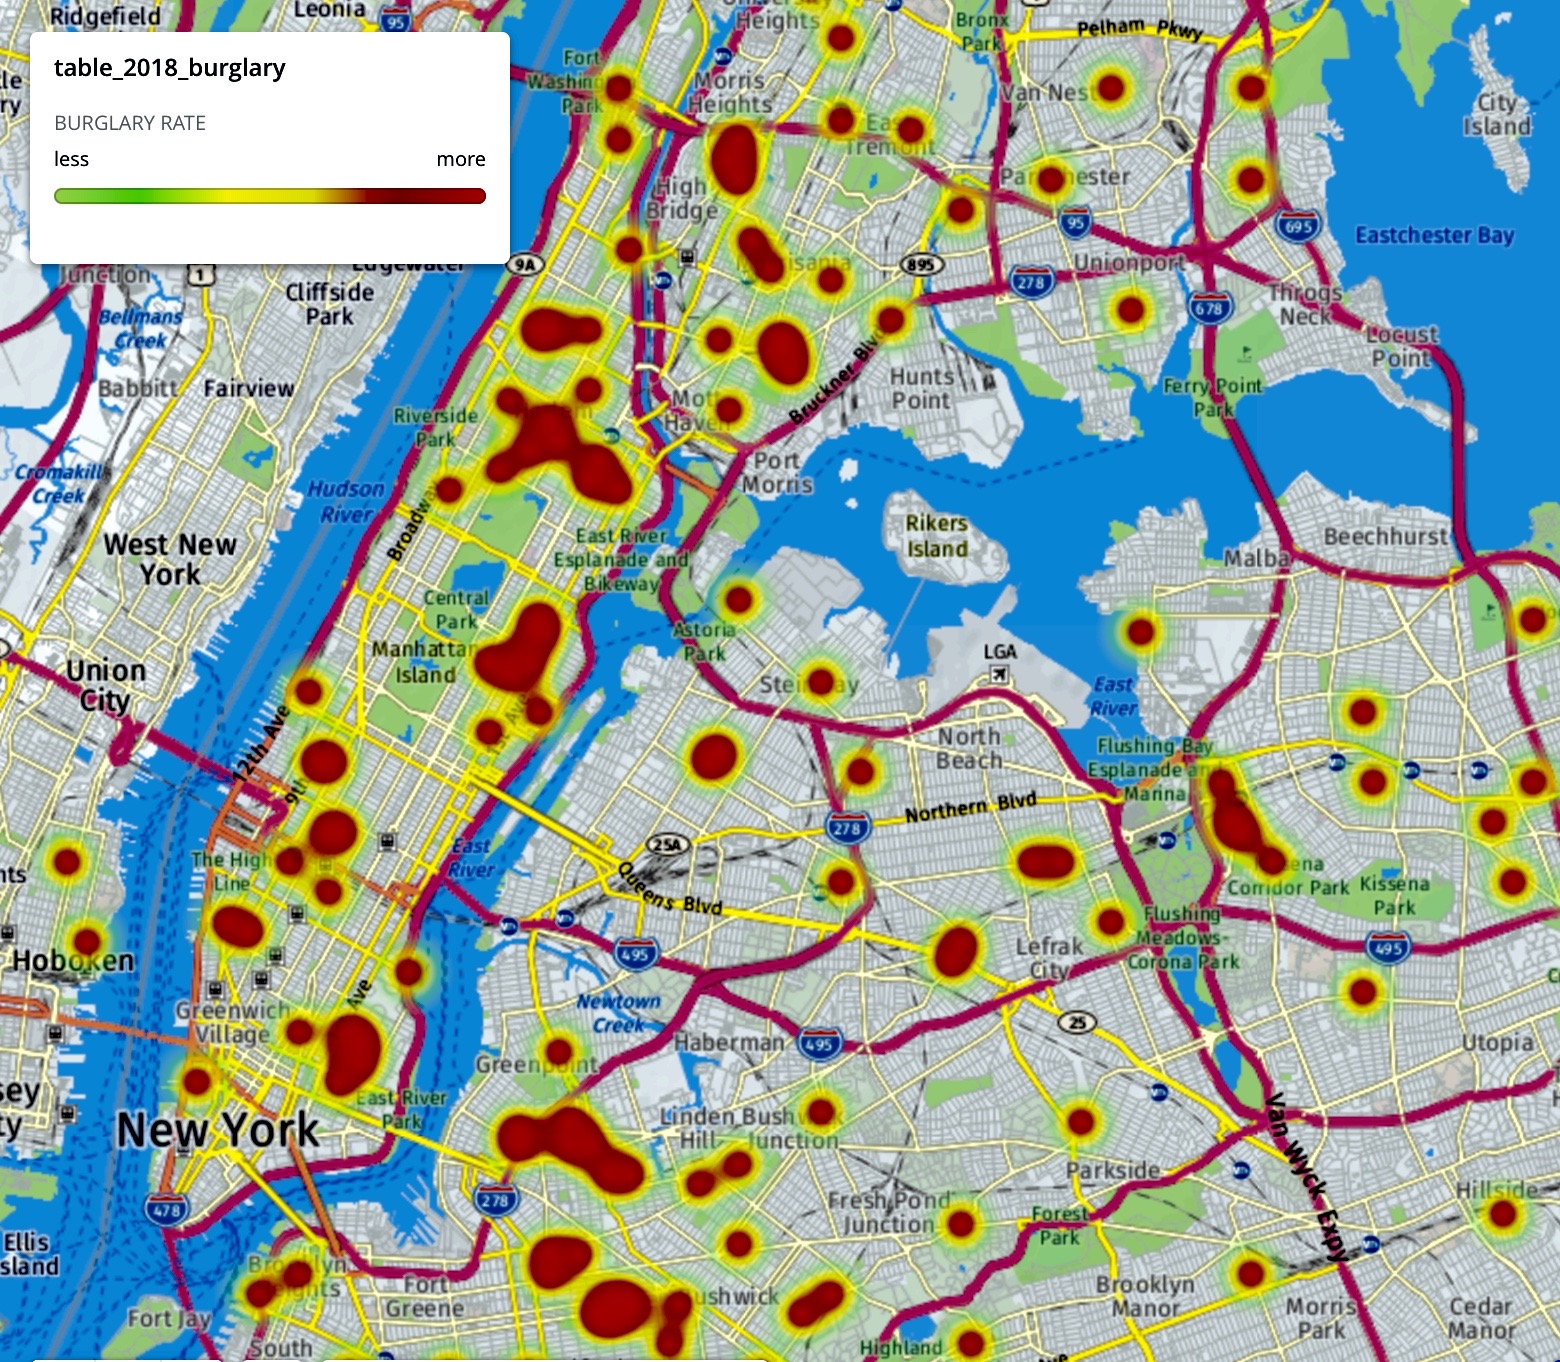

In [4]:
Image(filename="img/2018_burglary.jpg",width=400,height=400)

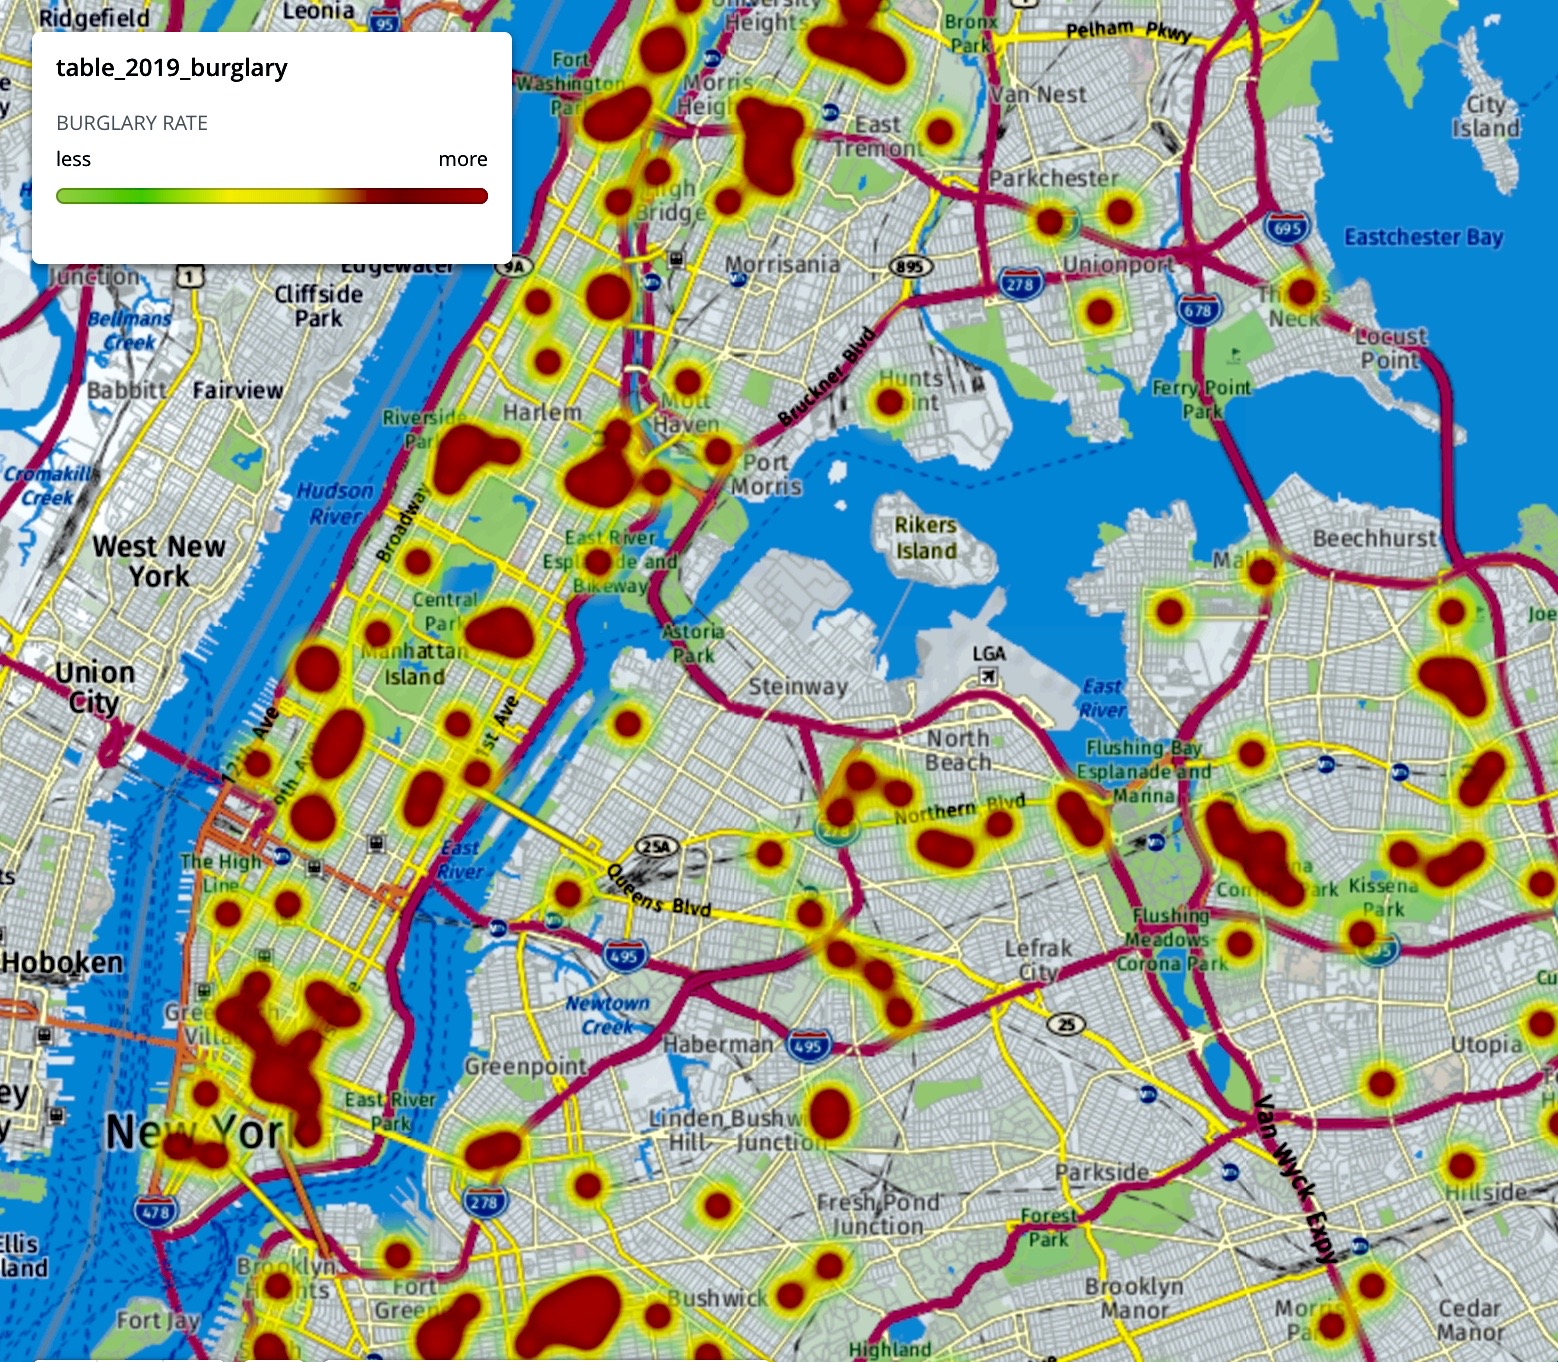

In [6]:
Image(filename="img/2019_burglary.jpg",width=400,height=400)

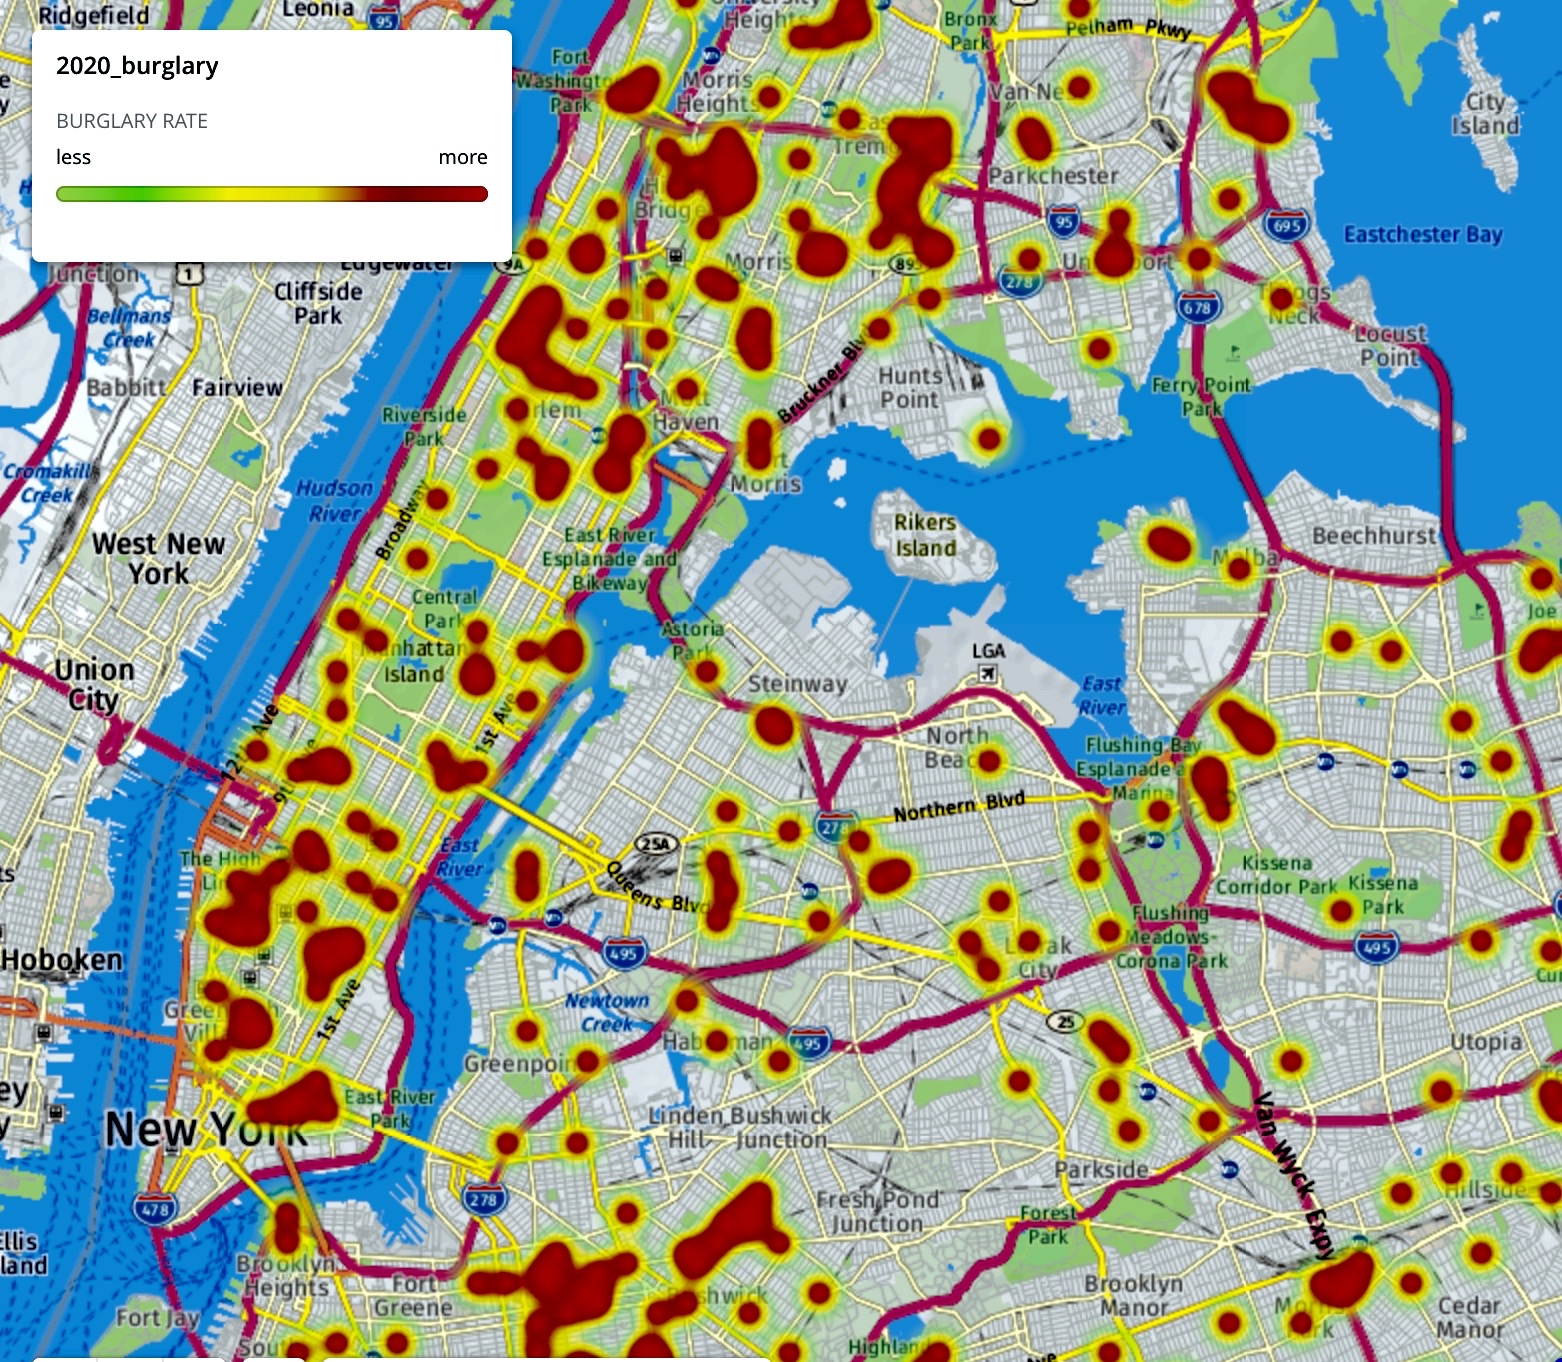

In [7]:
Image(filename="img/2020_burglary.jpg",width=400,height=400)

Again, burglary cases do not seem to be decreasing during the coronavirus outbreak. We can observe that the burglary crime concentrations in year 2020 are much more spread out comparing to previous years. The concentrations also have a shifted focus on Forest Park and Marbill hill area where some local markets located at.

#### Now let's exam Heatmaps only on robbery cases for March 1-22, 2018-2020

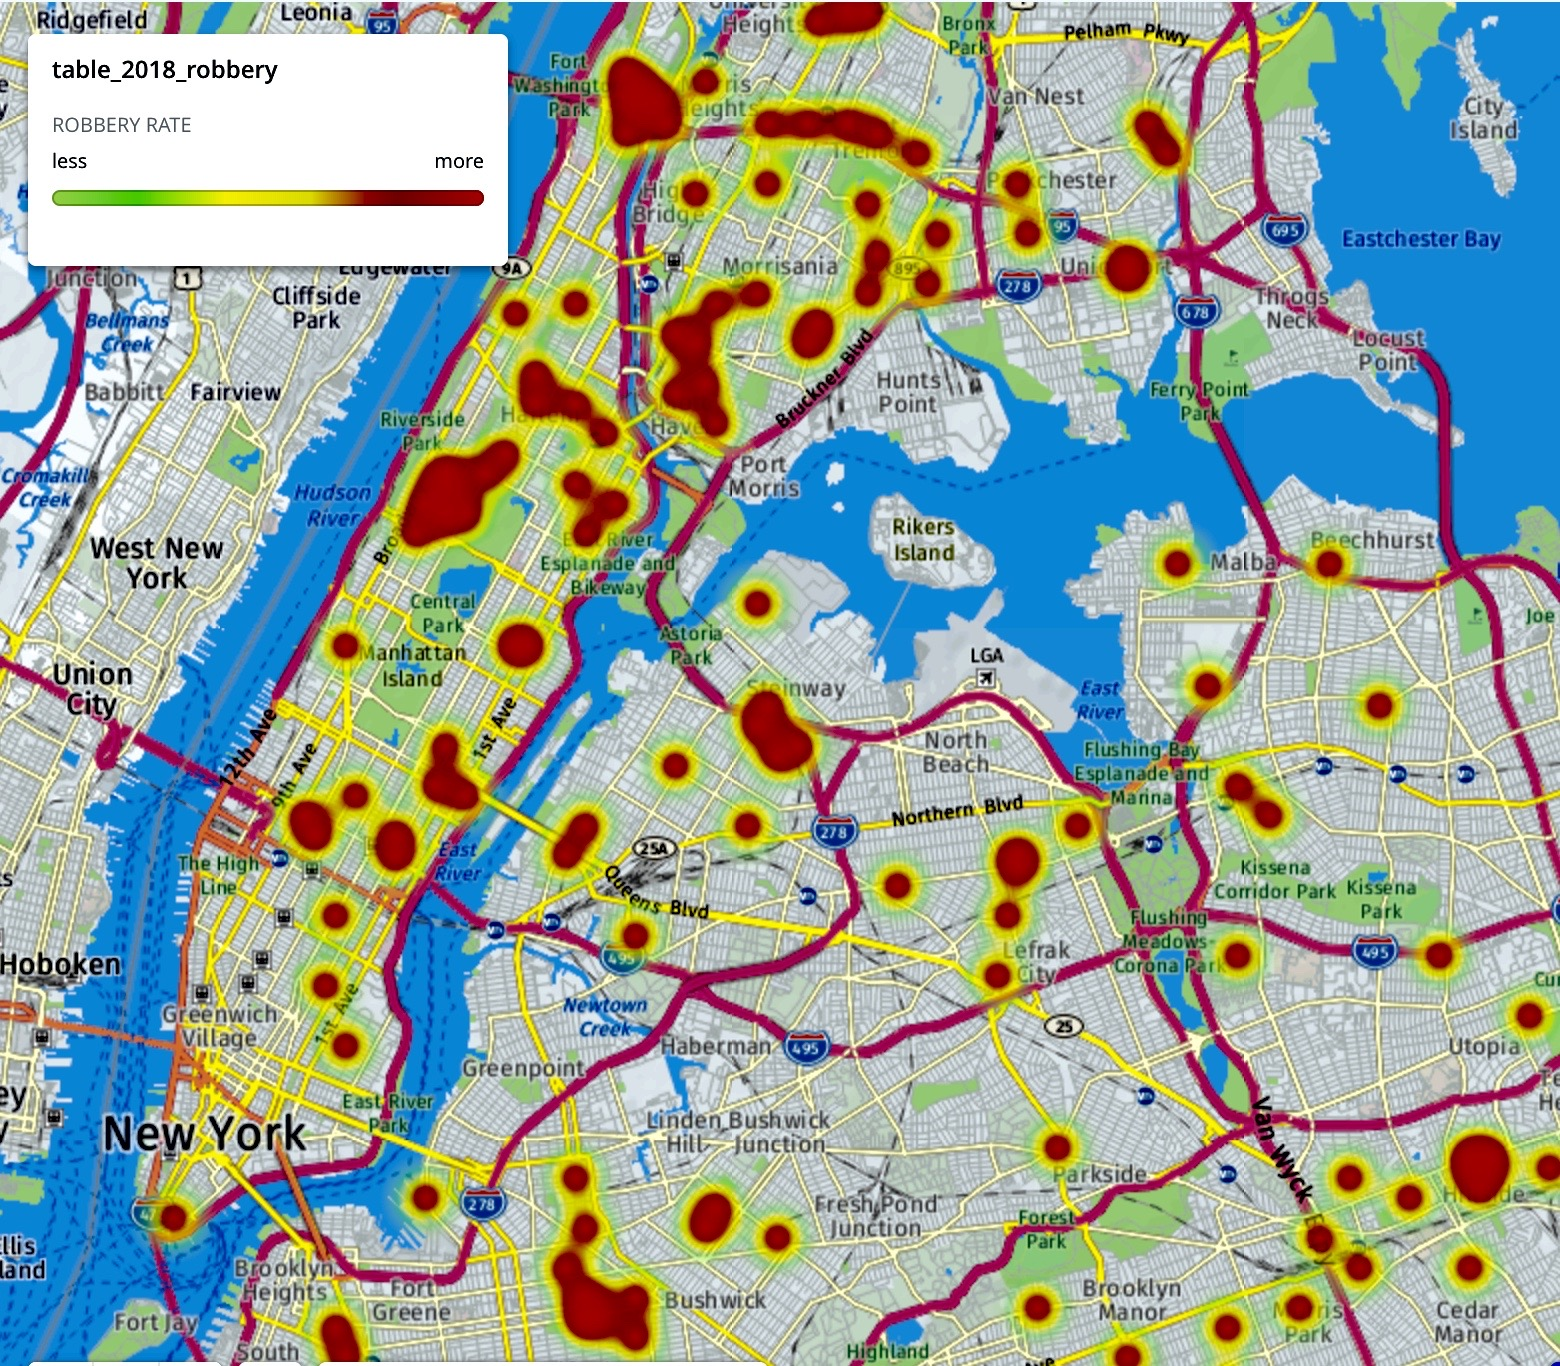

In [8]:
Image(filename="img/2018_robbery.jpg",width=400,height=400)

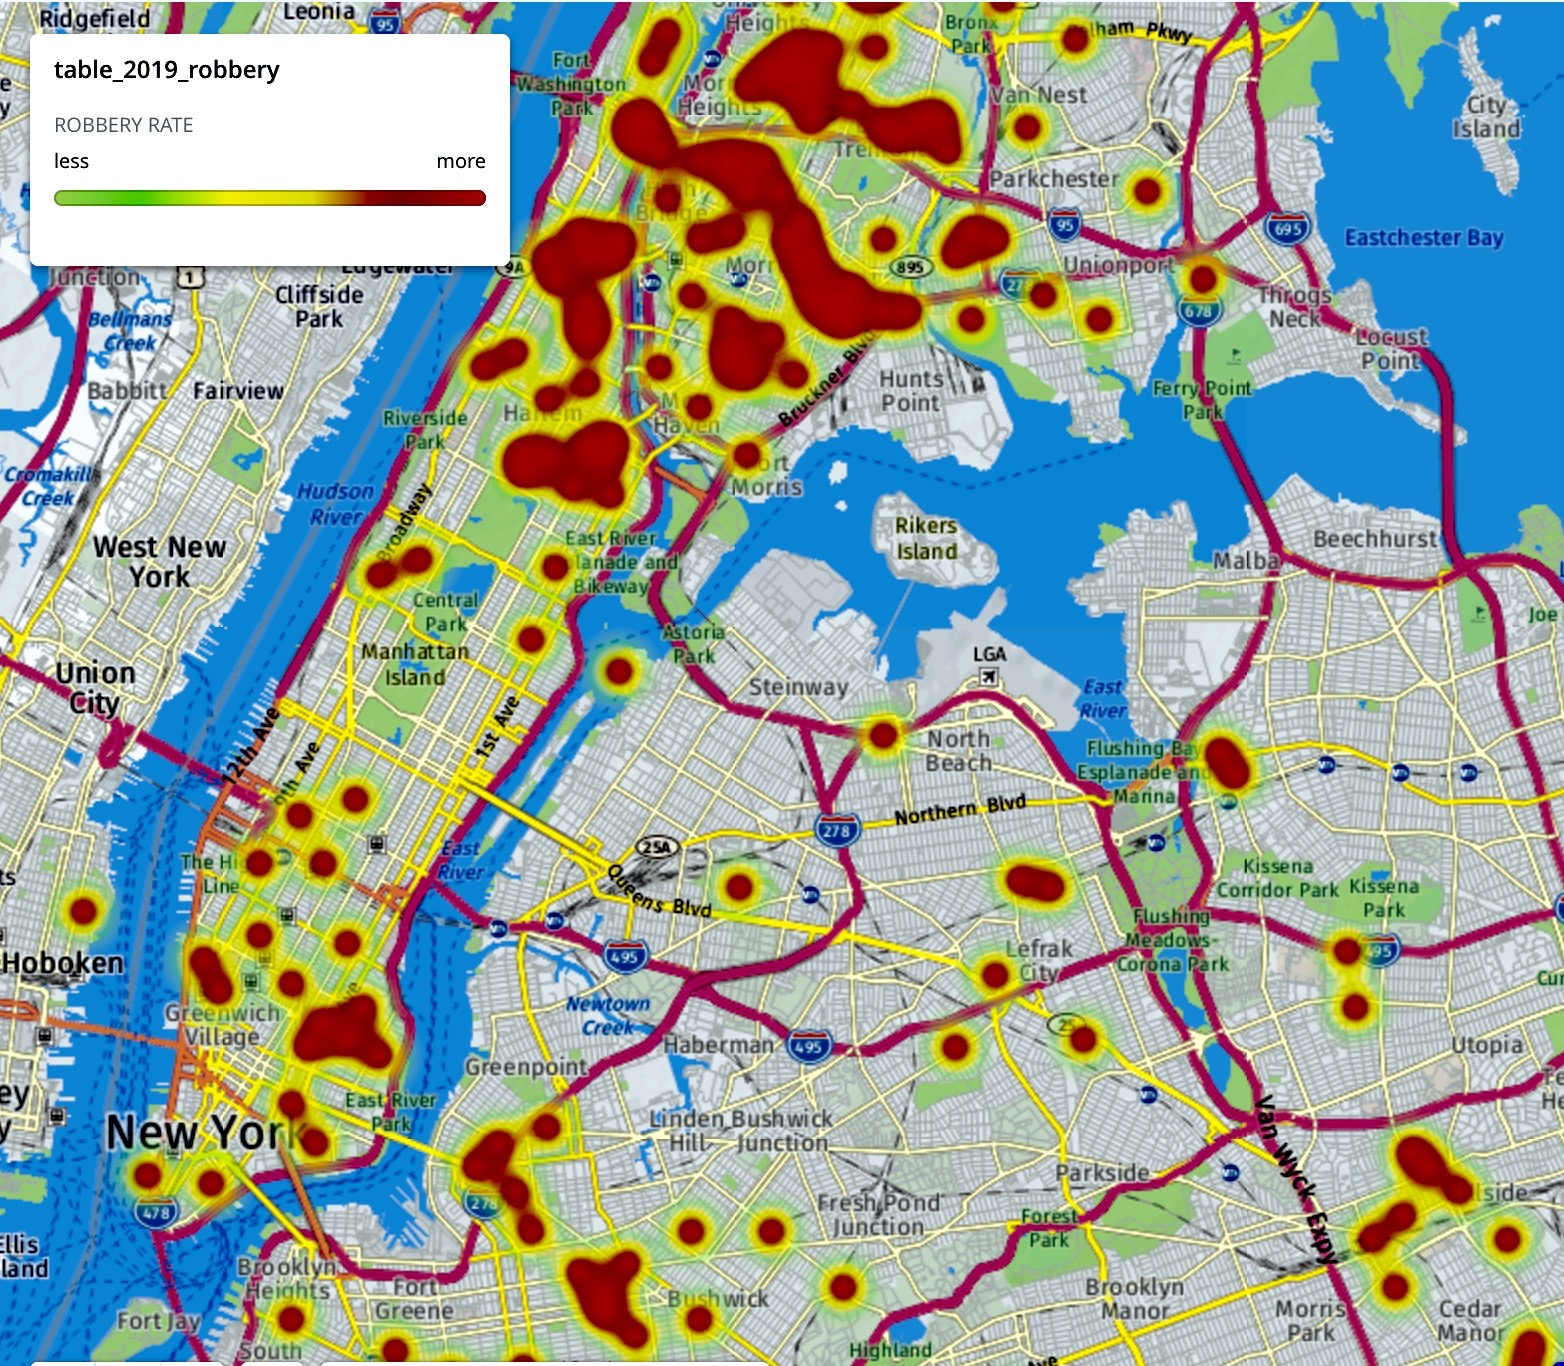

In [10]:
Image(filename="img/2019_robbery.jpg",width=400,height=400)

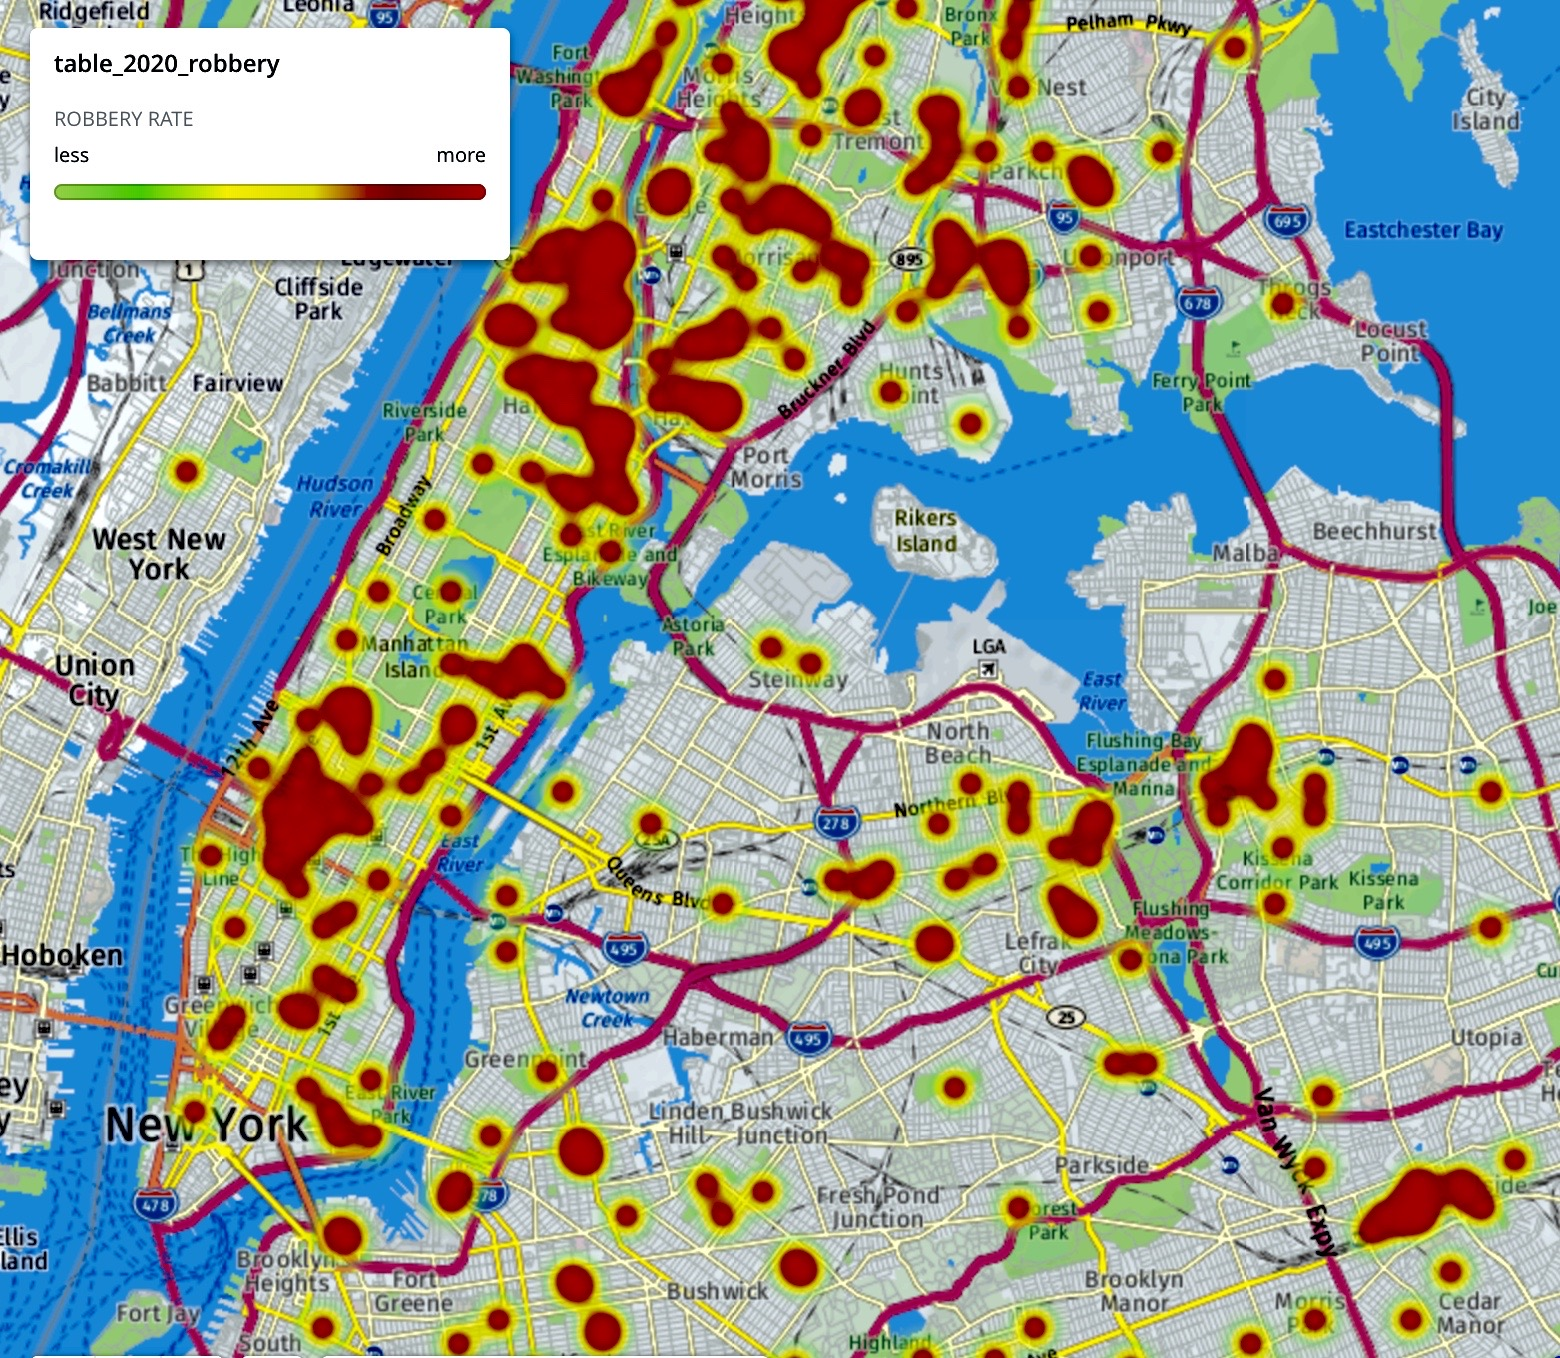

In [9]:
Image(filename="img/2020_robbery.jpg",width=400,height=400)

Robbery cases in year 2020 also presented a more scattered distribution comparing with previous years. During coronavirus outbreak, new robbery concentrations are near midtown Manhattan area and Lenox area where people used to gather at. Interestingly, both 

## Summary

In general, during the period March 1st to March 22nd, we cannot say with 100% confidence that crime rate increased or decreased compared to previous years because of the coronavirus crisis. We provide the main findings of the analysis below:

1. We can observe that as coronavirus cases increased from March 1st 2020, the number of burglary cases decreased, which can be connected to fact that people are mandated to stay at home. 
2. We were not able to find any correlation between the number of robbery cases and the number of coronavirus cases in NYC. As mentioned above, this is most likely due to the nature of the crime. 
3. We observed a scattered distribution trend from the crime heatmap, which may be because crimes are focused on local neighborhoods.

We hope that these results will help in any way for preventing and avoiding crimes during this pandemic.  
Thank you.  

By Luis Lu and Yuki Nishimura